In [82]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [101]:
import pandas as pd
import nltk
import numpy as np
import textblob
import seaborn as sns
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
VaderAnalyzer = SentimentIntensityAnalyzer()
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

cr = pd.read_csv('final_gcc_clean.csv')
cr.head()
# cr["published_date"] = cr["published_date"].apply(pd.to_datetime)
cr.isnull().sum()
cr.info()
cr

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7927 entries, 0 to 7926
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   subject_level_1_desc        7927 non-null   object 
 1   subject_level_2_desc        7927 non-null   object 
 2   subject_level_3_desc        7927 non-null   object 
 3   sentiment_desc              7927 non-null   object 
 4   comm_type                   7927 non-null   object 
 5   verbatim_cdownload_content  7927 non-null   object 
 6   fiscal_period               7927 non-null   object 
 7   Polarity                    7927 non-null   float64
 8   Vader_sentiment             7927 non-null   object 
 9   clean                       7907 non-null   object 
dtypes: float64(1), object(9)
memory usage: 619.4+ KB


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Micha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,subject_level_1_desc,subject_level_2_desc,subject_level_3_desc,sentiment_desc,comm_type,verbatim_cdownload_content,fiscal_period,Polarity,Vader_sentiment,clean
0,Feedback - FBK,Other,Other,Negative,Facebook,Rinse your mouth then spit in your hands. Get ...,5/15/2020,0.0000,neutral,rinse mouth spit hand get double duty one product
1,Feedback - FBK,Other,Other,Negative,Instagram,@listerine is going to hate you @joerogan ð???,8/8/2019,-0.6416,negative,listerine going hate joerogan
2,Feedback - FBK,Other,Other,Neutral,Facebook,#Listerine \nMorning breath is definitely the ...,7/3/2019,0.5892,positive,listerine morning breath definitely worst
3,Inquiry,Marketing Services,Availability,Negative,Facebook,Why was the prebrush rinse discontinued and is...,10/1/2018,0.0000,neutral,prebrush rinse discontinued something similar
4,Inquiry,Product,Product Attribute,Positive,Facebook,Thats the onley one i bi love it,6/14/2020,0.6369,positive,thats onley one bi love
...,...,...,...,...,...,...,...,...,...,...
7922,Feedback - FBK,Other,Other,Negative,Facebook,"You are victim of product tampering, please vi...",7/5/2019,0.0516,positive,victim product tampering please view link http...
7923,Feedback - FBK,Product,Product Attribute,Positive,Instagram,"3x less plaque, 3x healthier gums, instant fre...",5/9/2019,0.3182,positive,x le plaque x healthier gum instant fresh brea...
7924,Adverse Event - MED / AE,AE/Health Event,Misuse,Negative,Social Media,Tried but I don't swallow ;),12/8/2018,-0.2498,negative,tried swallow
7925,Feedback - FBK,Other,Other,Neutral,Facebook,Listerine Products,6/17/2019,0.0000,neutral,listerine product


,subject_level_1_desc,subject_level_2_desc,subject_level_3_desc,sentiment_desc,comm_type,verbatim_cdownload_content,fiscal_period,Polarity,Vader_sentiment,clean
0,Feedback - FBK,Other,Other,Negative,Facebook,Rinse your mouth then spit in your hands. Get ...,5/15/2020,0.0000,neutral,rinse mouth spit hand get double duty one product
1,Feedback - FBK,Other,Other,Negative,Instagram,@listerine is going to hate you @joerogan ð???,8/8/2019,-0.6416,negative,listerine going hate joerogan
2,Feedback - FBK,Other,Other,Neutral,Facebook,#Listerine \nMorning breath is definitely the ...,7/3/2019,0.5892,positive,listerine morning breath definitely worst
3,Inquiry,Marketing Services,Availability,Negative,Facebook,Why was the prebrush rinse discontinued and is...,10/1/2018,0.0000,neutral,prebrush rinse discontinued something similar
4,Inquiry,Product,Product Attribute,Positive,Facebook,Thats the onley one i bi love it,6/14/2020,0.6369,positive,thats onley one bi love


## Preparing Review column for furthere analysis

Here, you can see that we have some contractions like “It’s”, numbers like “3” and punctuations like “,”, “!” and “.” present in the reviews. We’ll handle these by performing the below operations:

1. Expand contractions
2. Lowercase the reviews
3. Remove digits and words containing digits
4. Remove punctuations
So, let’s start by expanding contractions.

## cleaned dataset

In [102]:
# dealing with contraction
# # change all the values to str
cr['cleaned1']=cr['verbatim_cdownload_content'].apply(str)
#Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
cr["cleaned1"]= cr['cleaned1'].apply(lambda x:expand_contractions(x))
cr.head()

#Delete punctuation
cr['cleaned1']=cr['cleaned1'].apply(lambda x: re.sub('\w*\d\w*','', x))
# cr.head()

# ## Lower Case
cr['cleaned1']=cr['cleaned1'].apply(lambda x: x.lower())

# # changing &n symbol to word and
cr['cleaned1']=cr['cleaned1'].apply(lambda x: re.sub('&','and',x))

# changing &n symbol to word and
cr['cleaned1']=cr['cleaned1'].apply(lambda x: re.sub('@',' ',x))
# changing &n symbol to word and
#cr['cleaned1']=cr['cleaned1'].apply(lambda x: re.sub(')',' ',x))
# changing &n symbol to word and
cr['cleaned1']=cr['cleaned1'].apply(lambda x: re.sub(';',' ',x))
# changing &n symbol to word and
cr['cleaned1']=cr['cleaned1'].apply(lambda x: re.sub('$',' ',x))
# changing &n symbol to word and
cr['cleaned1']=cr['cleaned1'].apply(lambda x: re.sub('!',' ',x))
# changing &n symbol to word and
cr['cleaned1']=cr['cleaned1'].apply(lambda x: re.sub('%',' ',x))
# changing &n symbol to word and
#cr['cleaned1']=cr['cleaned1'].apply(lambda x: re.sub('(',' ',x))
# changing &n symbol to word and
cr['cleaned1']=cr['cleaned1'].replace(")" , " ")
# changing &n symbol to word and
cr['cleaned1']=cr['cleaned1'].replace("$", " ")
cr["cleaned1"] = cr["cleaned1"].replace("."," ")


## cleaned & stemm and tokenized dataset

In [53]:
import pandas as pd
import nltk
import numpy as np
from textblob import TextBlob


#TExt Data Processing
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
snow = nltk.stem.SnowballStemmer('english')

def fix_Text(text):
	letters_only = re.sub("[^a-zA-Z]"," ", str(text))
	words=letters_only.lower().split()
	meaningful=[snow.stem(word) for word in words if word not in stop_words]
	return(" ".join(meaningful))

cr['cleaned1'] = cr.verbatim_cdownload_content.apply(fix_Text)
#cr['clean'] = cr['clean'].str.split(" ").str[1:]
cr['cleaned1'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Micha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    rins mouth spit hand get doubl duti one product
1                          listerin go hate joerogan
2                 listerin morn breath definit worst
3            prebrush rins discontinu someth similar
4                             that onley one bi love
Name: cleaned1, dtype: object

## Analyzing text statistics
Text statistics visualizations are simple but very insightful techniques. 

They include:

1. word frequency analysis,
2. sentence length analysis,
3. average word length analysis,
4. etc.
Those really help explore the fundamental characteristics of the text data.

To do so, we will be mostly using histograms (continuous data) and bar charts (categorical data).

First, I’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the reviews length.

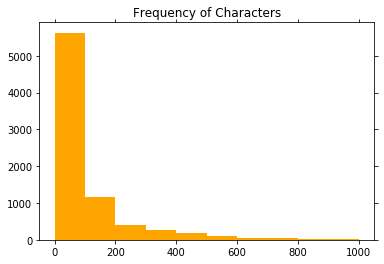

In [54]:
colors = ['orange']
ax = cr["cleaned1"].str.len().hist(range = (0,1000),color = colors)
ax.set_title("Frequency of Characters")
# ax.spine.set_visible(False)
ax.tick_params(bottom="off", top="off", left="off", right="off")
ax.grid(False)


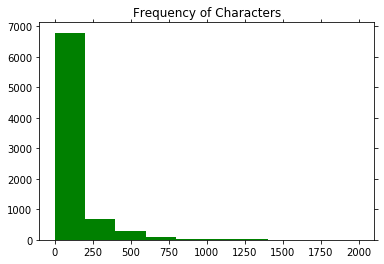

In [55]:
colors = ["Green"]
ax = cr["cleaned1"].str.len().hist(range = (0,2000), color = colors)
ax.set_title("Frequency of Characters")
# ax.spine.set_visible(False)
ax.tick_params(bottom="off", top="off", left="off", right="off")
ax.grid(False)


- As you can see the majority of our reviews range is between 0 and 200 characters.

- we will move on to data exploration at a word-level. Let’s plot the number of words appearing in each news headline.

In [56]:
# # Code Snippet for Word Number Histogram
# colors = ["red"]
# cr['verbatim_cdownload_content_without_symbol']=cr['verbatim_cdownload_content_without_symbol'].apply(str)
# ax = cr['verbatim_cdownload_content_without_symbol'].str.split().\
#    apply(lambda x : [len(i) for i in x]). \
#    map(lambda x: np.mean(x)).hist(range = (1, 25), color = colors)
# ax.tick_params(bottom="off", top="off", left="off", right="off")
# ax.grid(False)



In [15]:
# # Code Snippet for Word Number Histogram
# colors = ["yellow"]
# ax = cr['clean'].str.split().\
#    apply(lambda x : [len(i) for i in x]). \
#    map(lambda x: np.mean(x)).hist(range = (1, 25), color = colors)
# ax.tick_params(bottom="off", top="off", left="off", right="off")
# ax.grid(False)


- As you can see the average word length ranges between 1 to 9 with 5 being the most common length.

* One reason why this may not be true is stopwords. Stopwords are the words that are most commonly used in any language such as “the”,” a”,” an” etc. As these words are probably small in length these words may have caused the above graph to be left-skewed.

#### Analyzing the amount and the types of stopwords can give us some good insights into the data.

- To get the corpus containing stopwords you can use the nltk library. Nltk contains stopwords from many languages. Since we are only dealing with English news I will filter the English stopwords from the corpus.

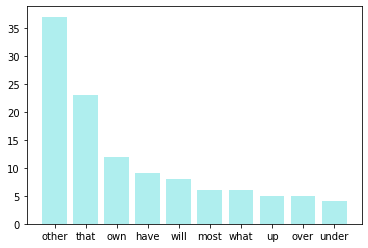

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y, color = '#afeeee')
    
plot_top_stopwords_barchart(cr['cleaned1'])    

In [17]:
# plot_top_stopwords_barchart(cr['clean']) 

- So now we know which stopwords occur frequently in our text, let’s inspect which words other than these stopwords occur frequently.

###  We will use the counter function from the collections library to count and store the occurrences of each word in a list of tuples. This is a very useful function when we deal with word-level analysis in natural language processing.

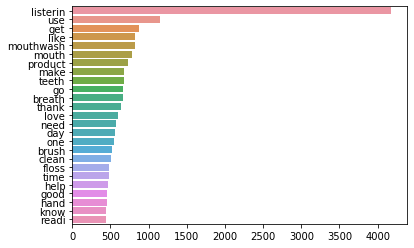

In [58]:
# Code Snippet for Top Non-Stopwords Barchart

import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:25]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)
    
    
plot_top_non_stopwords_barchart(cr['cleaned1'])    

In [20]:
# plot_top_non_stopwords_barchart(cr['clean'])    

- As a result it is clear thet we have the word listerine as the most frequent non-stopwords.

## Ngram exploration
Ngrams are simply contiguous sequences of n words.If the number of words is two, it is called bigram. For 3 words it is called a trigram and so on.

Looking at most frequent n-grams can give you a better understanding of the context in which the word was used.

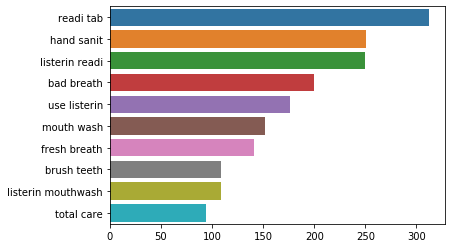

In [59]:
from nltk.util import ngrams
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    
    
plot_top_ngrams_barchart(cr['cleaned1'],2)    

In [23]:
# plot_top_ngrams_barchart(cr['clean'],2) 

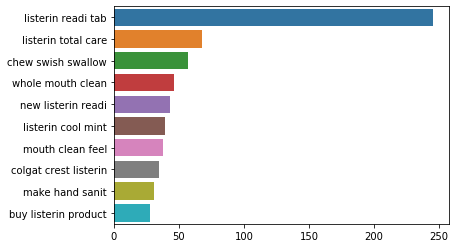

In [60]:
plot_top_ngrams_barchart(cr['cleaned1'],3)   

In [25]:
# plot_top_ngrams_barchart(cr['clean'],3) 

## Topic Modeling exploration with pyLDAvis

* Topic modeling is the process of using unsupervised learning techniques to extract the main topics that occur in a collection of documents.
* Latent Dirichlet Allocation (LDA) is an easy to use and efficient model for topic modeling. Each document is represented by the distribution of topics and each topic is represented by the distribution of words. and Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora
- Once we categorize our documents in topics we can dig into further data exploration for each topic or topic group. 

- But before getting into topic modeling we have to pre-process our data a little. We will:

1. tokenize: the process by which sentences are converted to a list of tokens or words
2. remove stopwords
3. lemmatize: reduces the inflectional forms of each word into a common base or root.
4. convert to the bag of words: Bag of words is a dictionary where the keys are words(or ngrams/tokens) and values are the number of times each word occurs in the corpus.


In [61]:
import pandas as pd
import nltk
import numpy as np
from textblob import TextBlob


#TExt Data Processing
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
snow = nltk.stem.SnowballStemmer('english')

def fix_Text(text):
	letters_only = re.sub("[^a-zA-Z]"," ", str(text))
	words=letters_only.lower().split()
	meaningful=[snow.stem(word) for word in words if word not in stop_words]
	return(" ".join(meaningful))

cr['cleaned1'] = cr.verbatim_cdownload_content.apply(fix_Text)
#cr['clean'] = cr['clean'].str.split(" ").str[1:]
cr['cleaned1'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Micha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    rins mouth spit hand get doubl duti one product
1                          listerin go hate joerogan
2                 listerin morn breath definit worst
3            prebrush rins discontinu someth similar
4                             that onley one bi love
Name: cleaned1, dtype: object

In [63]:
# Code Snippet for Creating LDA visualization

import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim


def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 3, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
    return vis

In [64]:
# TF-IDF
# Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

NameError: name 'bow_corpus' is not defined

##### Document-Term Representation
* After pre-processing, we need to convert our text data into a document-term or term-document representation that we can analyze.

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
tfVec = CountVectorizer()
tfdtm = tfVec.fit_transform(cr.clean)
tfdtm
#tf_feature_names = tfVec.get_feature_names()


<7927x18138 sparse matrix of type '<class 'numpy.int64'>'
	with 112903 stored elements in Compressed Sparse Row format>

In [32]:
#tf_feature_names = tfVec.get_feature_names()
doc_lda = lda_model[bow_corpus]
print(lda_model.print_topics())

NameError: name 'lda_model' is not defined

In [40]:
#List top  n  terms for a single topic
lda_model.show_topic(1, topn=10)

NameError: name 'lda_model' is not defined

In [78]:
lda_model, bow_corpus, dic = get_lda_objects(cr['clean'])
lda_model.show_topics()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Micha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[(0,
  '0.027*"listerin" + 0.021*"get" + 0.020*"product" + 0.013*"use" + 0.013*"start" + 0.010*"mouth" + 0.008*"mouthwash" + 0.007*"teeth" + 0.007*"make" + 0.007*"like"'),
 (1,
  '0.036*"listerin" + 0.011*"thank" + 0.006*"main" + 0.006*"use" + 0.005*"love" + 0.005*"menu" + 0.004*"new" + 0.004*"one" + 0.004*"know" + 0.004*"mouthwash"'),
 (2,
  '0.027*"listerin" + 0.010*"readi" + 0.010*"tab" + 0.008*"breath" + 0.007*"like" + 0.007*"fresh" + 0.006*"mouth" + 0.005*"clean" + 0.005*"swallow" + 0.005*"new"')]

In [79]:
plot_lda_vis(lda_model, bow_corpus, dic)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.124391 -0.007185       1        1  47.735688
2      0.068751 -0.098653       2        1  27.756771
1      0.055640  0.105838       3        1  24.507541, topic_info=        Term         Freq        Total Category  logprob  loglift
12     start   825.000000   825.000000  Default  30.0000  30.0000
3        get  1471.000000  1471.000000  Default  29.0000  29.0000
304      tab   377.000000   377.000000  Default  28.0000  28.0000
132    readi   402.000000   402.000000  Default  27.0000  27.0000
0    product  1435.000000  1435.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
169     like   111.876071   802.181137   Topic3  -5.6842  -0.5638
162      got    78.117448   237.083418   Topic3  -6.0433   0.2960
124      day    93.598737   507.994159   Topic3  -5.8625  -0.2853
766    smile    75.042095   295.630885   Topic3  -6.0835   0.0351
66      help    73.283185   437.627301   Topic3  -6.1072  -0.3808

[250 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
299       1  0.264942  advertis
299       3  0.732488  advertis
1384      1  0.923148   alcohol
1384      2  0.070181   alcohol
1384      3  0.005399   alcohol
...     ...       ...       ...
151       1  0.508713      year
151       2  0.053766      year
151       3  0.438403      year
442       1  0.950004      zero
442       2  0.054286      zero

[409 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

- topic coherence score is always used to measure how well the topics are extracted:
- Coherence measures the relative distance between words within a topic. There are two major types C_V typically 0 < x < 1 and uMass -14 < x < 14. It's rare to see a coherence of 1 or +.9 unless the words being measured are either identical words or bigrams. Like United and States would likely return a coherence score of ~.94 or hero and hero would return a coherence of 1. The overall coherence score of a topic is the average of the distances between words

3 is bad

.4 is low

.55 is okay

.65 might be as good as it is going to get

.7 is nice

.8 is unlikely and

.9 is probably wrong

Low coherence fixes:


### Coherence Score:  0.5834692668994033

The coherence score is for assessing the quality of the learned topics.

## Wordcloud

- Wordcloud is a great way to represent text data. The size and color of each word that appears in the wordcloud indicate it’s frequency or importance.
  Creating wordcloud in python with is easy but we need the data in a form of a corpus. Luckily, I prepared it in the previous section.

In [46]:
# Code Snippet for Wordcloud

import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk

def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    wordcloud = WordCloud(
          width=800,
          height=600,
          min_font_size=14,
          background_color="white",
          colormap="spring")
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

In [115]:
# plot_wordcloud(cr['clean'])
cr["cleaned1"].to_csv(r'C:\Users\micha\Desktop\gcc_cleannnn.csv', index = False, header=True)

In [118]:
import matplotlib.pyplot as pPlot
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image
dataset = open("gcc_cleannnn.csv", "r").read()
def create_word_cloud(string):
    maskArray = npy.array(Image.open("JJ.png"))
    cloud = WordCloud(background_color = "white", max_words = 50, mask = maskArray, stopwords = set(STOPWORDS))
    cloud.generate(string)
    cloud.to_file("pic1.jpg")
dataset = dataset.lower()
create_word_cloud(dataset)


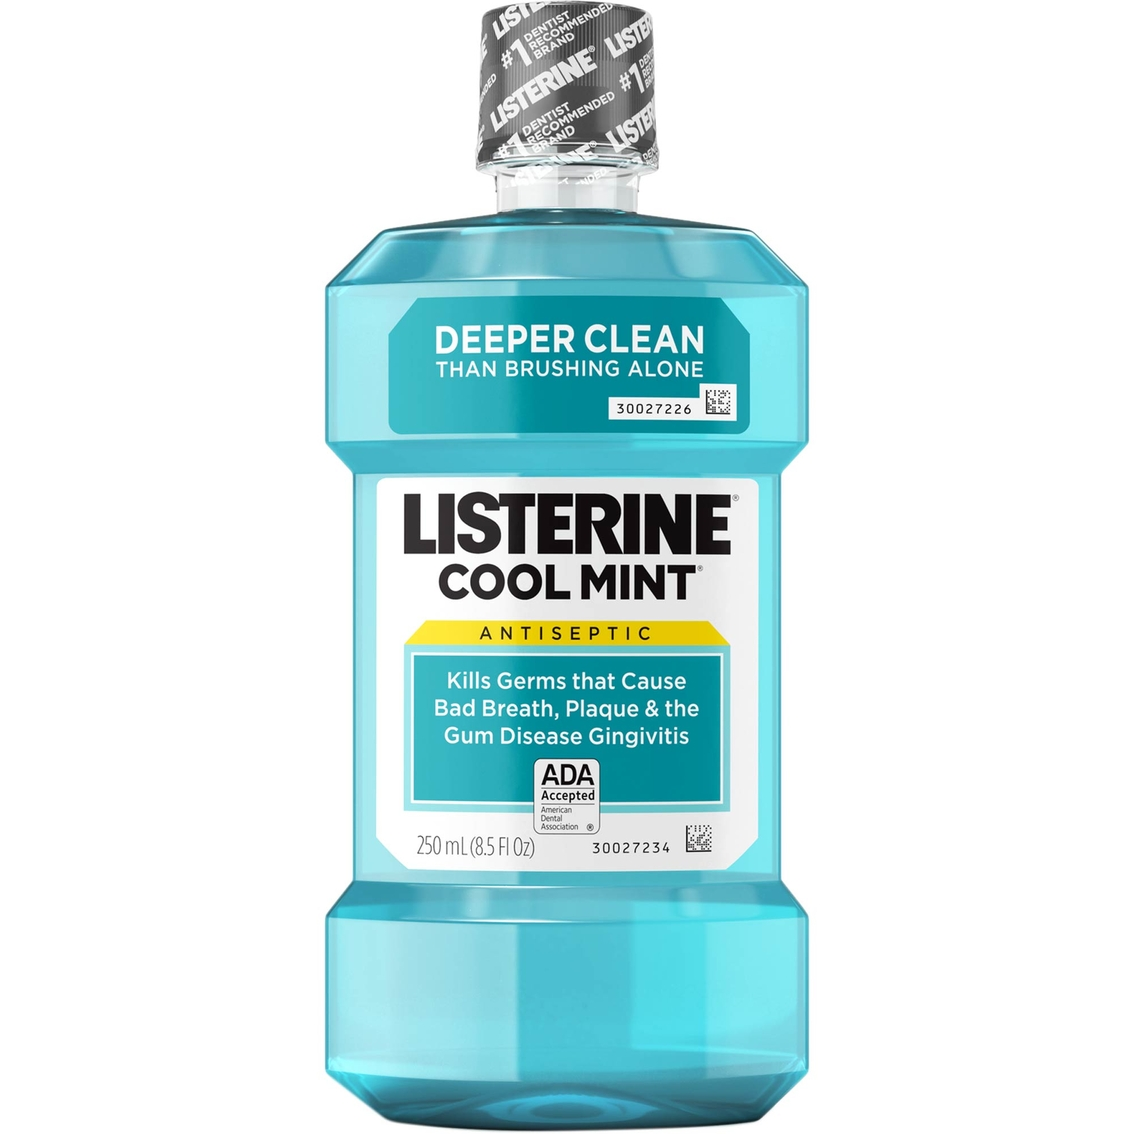
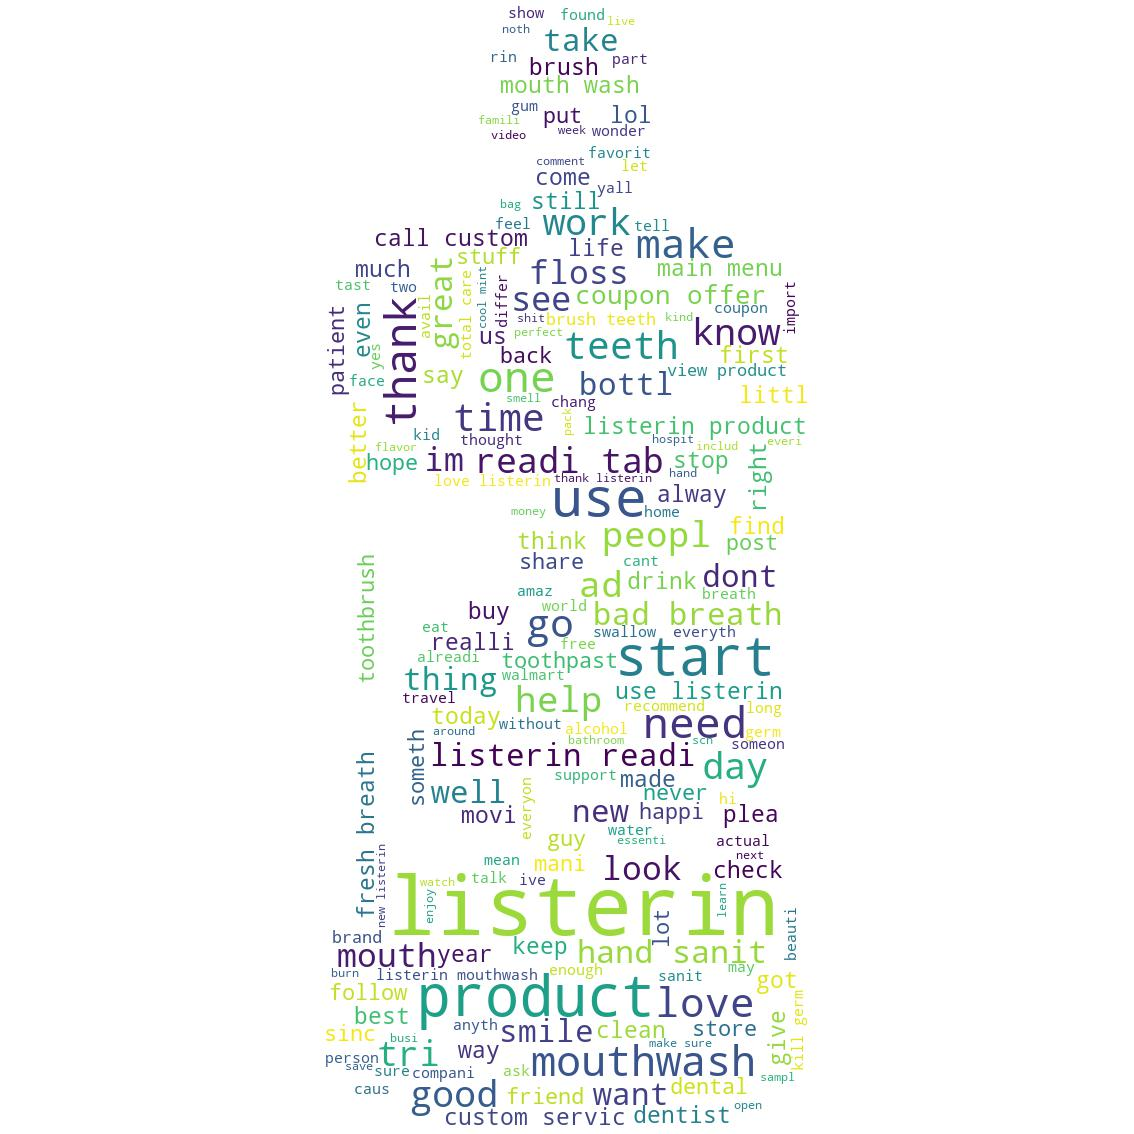

# sentiment Analysis
- Sentiment analysis is a very common natural language processing task in which we determine if the text is positive, negative or neutral. This is very useful for finding the sentiment associated with reviews, comments which can get us some valuable insights out of text data.
- I personally like TextBlob and Vader Sentiment.

### Textblob
- Textblob is a python library built on top of nltk. It has been around for some time and is very easy and convenient to use.

- The sentiment function of TextBlob returns two properties:

## polarity:
### is a floating-point number that lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.
## subjectivity: 
### refers to how someone’s judgment is shaped by personal opinions and feelings. Subjectivity is represented as a floating-point value which - lies in the range of [0,1].

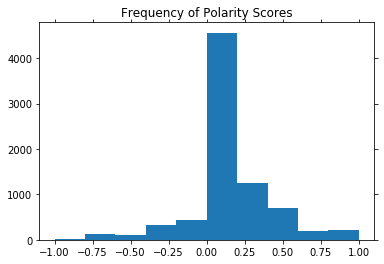

In [65]:
from textblob import TextBlob
def polarity(text):
    return TextBlob(text).sentiment.polarity

cr['polarity_score']=cr['cleaned1'].\
   apply(lambda x : polarity(x))
ax = cr['polarity_score'].hist()
ax.set_title("Frequency of Polarity Scores")
ax.tick_params(bottom="off", top="off", left="off", right="off")
ax.grid(False)


In [43]:
# from textblob import TextBlob
# def polarity(text):
#     return TextBlob(text).sentiment.polarity

# cr['polarity_score1']=cr['clean'].\
#    apply(lambda x : polarity(x))
# ax = cr['polarity_score1'].hist()
# ax.set_title("Frequency of Polarity Scores")
# ax.tick_params(bottom="off", top="off", left="off", right="off")
# ax.grid(False)


### You can see that polarity mainly ranges between 0.0 and 0.20. This indicated that the majority of reviews are neutral.
- Let’s dig a bit deeper by classifying the news as negative, positive and neutral based on the scores.

<BarContainer object of 3 artists>

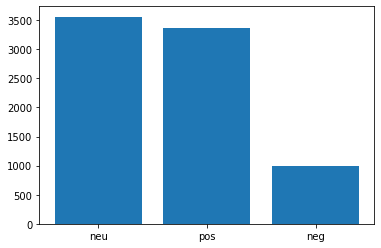

In [66]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
cr['polarity']=cr['polarity_score'].\
   map(lambda x: sentiment(x))

plt.bar(cr.polarity.value_counts().index,
        cr.polarity.value_counts())


In [46]:
# def sentiment(x):
#     if x<0:
#         return 'neg'
#     elif x==0:
#         return 'neu'
#     else:
#         return 'pos'
    
# cr['polarity1']=cr['polarity_score1'].\
#    map(lambda x: sentiment(x))

# plt.bar(cr.polarity1.value_counts().index,
#         cr.polarity1.value_counts())


In [67]:
cr["polarity"].value_counts()

neu    3561
pos    3369
neg     997
Name: polarity, dtype: int64

In [50]:
# cr["polarity1"].value_counts()

## Let’s take a look at some of the positive and negative headlines.

In [68]:
cr[cr['polarity'] =='pos']['cleaned1'].head()

4                                that onley one bi love
7                        love listerin glad tip help us
8     listerin creat posit consum tie custom mimoo c...
18                       sure flavor listerin get point
19    use listerin coupl year certain taken care ble...
Name: cleaned1, dtype: object

In [69]:
cr[cr['polarity'] =='neg']['cleaned1'].head()

1                             listerin go hate joerogan
2                    listerin morn breath definit worst
5     rememb good germ fight infect kill end serious...
9     germ left behind brush alon use listerin bugge...
27    mouthwash kill good bacteria mouth happen bad ...
Name: cleaned1, dtype: object

## Vader Sentiment Analysis

- The next library we are going to discuss is VADER. Vader works better in detecting negative sentiment. It is very useful in the case of social media text sentiment analysis.VADER or Valence Aware Dictionary and Sentiment Reasoner is a rule/lexicon-based, open-source sentiment analyzer pre-built library, protected under the MIT license.

#####  VADER sentiment analysis class returns a dictionary that contains the probabilities of the text for being positive, negative and neutral. Then we can filter and choose the sentiment with most probability.

##### We will do the same analysis using VADER and check if there is much difference.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Micha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


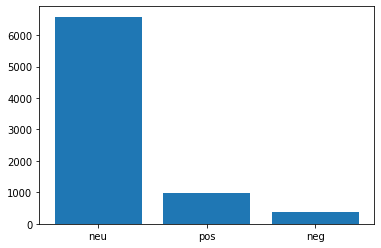

In [70]:
# Code Snippet for Sentiment Barchart

from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)  ## Polarity score returns dictionary
    ss.pop('compound')
    return max(ss, key=ss.get)        ###return ss

def sentiment_textblob(text):
        x = TextBlob(text).sentiment.polarity
        
        if x<0:
            return 'neg'
        elif x==0:
            return 'neu'
        else:
            return 'pos'

def plot_sentiment_barchart(text, method='TextBlob'):
    if method == 'TextBlob':
        sentiment = text.map(lambda x: sentiment_textblob(x))
    elif method == 'Vader':
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
        sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    else:
        raise ValueError('Textblob or Vader')
    
    plt.bar(sentiment.value_counts().index,
            sentiment.value_counts())
    
plot_sentiment_barchart(cr['cleaned1'], method='Vader')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Micha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


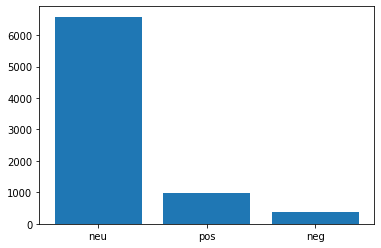

In [71]:
# Code Snippet for Sentiment Barchart

from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)  ## Polarity score returns dictionary
    ss.pop('compound')
    return max(ss, key=ss.get)        ###return ss

def sentiment_textblob(text):
        x = TextBlob(text).sentiment.polarity
        
        if x<0:
            return 'neg'
        elif x==0:
            return 'neu'
        else:
            return 'pos'

def plot_sentiment_barchart(text, method='TextBlob'):
    if method == 'TextBlob':
        sentiment = text.map(lambda x: sentiment_textblob(x))
    elif method == 'Vader':
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
        sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    else:
        raise ValueError('Textblob or Vader')
    
    plt.bar(sentiment.value_counts().index,
            sentiment.value_counts())
    
plot_sentiment_barchart(cr['cleaned1'], method='Vader')

## - Yep, there are some differences between charts, 80 percent of positives turned to be nutral, and negative reviews decresed too much.

## Named Entity Recognition
#### There are three standard libraries to do Named Entity Recognition:

- Standford NER
- spaCy
- NLTK

In this tutorial, I will use spaCy which is an open-source library for advanced natural language processing tasks. It is written in Cython and is known for its industrial applications. Besides NER, spaCy provides many other functionalities like pos tagging, word to vector transformation, etc.

SpaCy’s named entity recognition has been trained on the OntoNotes 5 corpus and it supports the following entity types:

There are three pre-trained models for English in spaCy. I will use en_core_web_sm for our task but you can try other models.

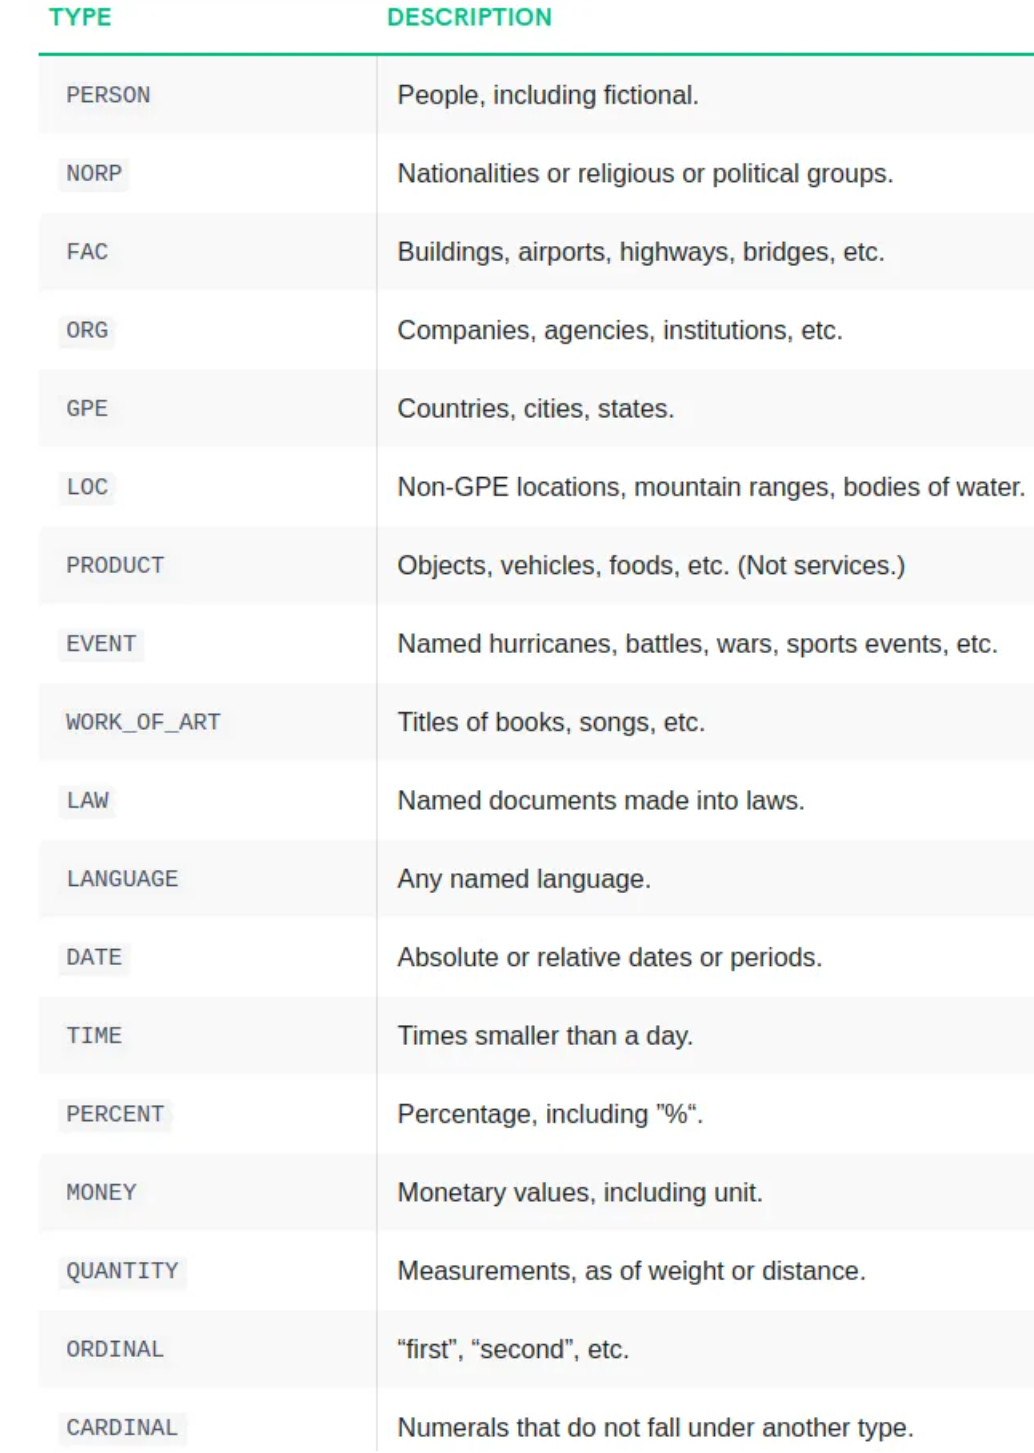

In [72]:
import spacy
from collections import  Counter
import seaborn as sns

def plot_named_entity_barchart(text):
    nlp = spacy.load("en_core_web_sm")
    
    def _get_ner(text):
        doc=nlp(text)
        return [X.label_ for X in doc.ents]
    
    ent=text.apply(lambda x : _get_ner(x))
    ent=[x for sub in ent for x in sub]
    counter=Counter(ent)
    count=counter.most_common()
    
    x,y=map(list,zip(*count))
    sns.barplot(x=y,y=x)
  

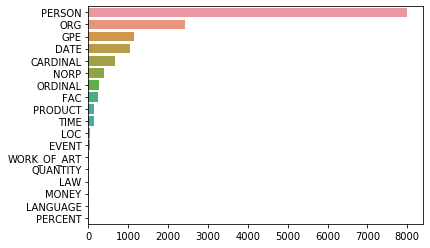

In [73]:
plot_named_entity_barchart(cr['cleaned1'])

In [74]:
# plot_named_entity_barchart(cr['clean'])

In [113]:
import spacy
from collections import  Counter
import seaborn as sns

def plot_most_common_named_entity_barchart(text, entity="ORG"):
    nlp = spacy.load("en_core_web_sm")
    
    def _get_ner(text,ent):
        doc=nlp(text)
        return [X.text for X in doc.ents if X.label_ == ent]

    entity_filtered=text.apply(lambda x: _get_ner(x,entity))
    entity_filtered=[i for x in entity_filtered for i in x]
    
    counter=Counter(entity_filtered)
    x,y=map(list,zip(*counter.most_common(10)))
    sns.barplot(y,x).set_title(entity)

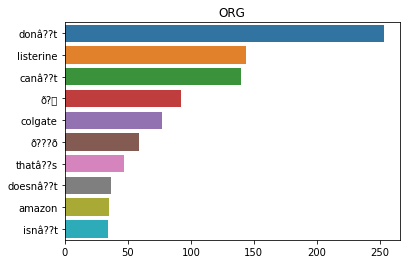

In [114]:
plot_most_common_named_entity_barchart(cr['cleaned1'], entity="ORG")

In [77]:
# plot_most_common_named_entity_barchart(cr['clean'], entity="PERSON")

## Exploration through Parts of Speach Tagging in python
* Parts of speech (POS) tagging is a method that assigns part of speech labels to words in a sentence. There are eight main parts of speech:

- Noun (NN)- Joseph, London, table, cat, teacher, pen, city
- Verb (VB)- read, speak, run, eat, play, live, walk, have, like, are, is
- Adjective(JJ)- beautiful, happy, sad, young, fun, three
- Adverb(RB)- slowly, quietly, very, always, never, too, well, tomorrow
- Preposition (IN)- at, on, in, from, with, near, between, about, under
- Conjunction (CC)- and, or, but, because, so, yet, unless, since, if
- Pronoun(PRP)- I, you, we, they, he, she, it, me, us, them, him, her, this
- Interjection (INT)- Ouch! Wow! Great! Help! Oh! Hey! Hi!
* This is not a straightforward task, as the same word may be used in different sentences in different contexts. However, once you do it, there are a lot  of helpful visualizations that you can create that can give you additional insights into your dataset.

I will use the nltk to do the parts of speech tagging but there are other libraries that do a good job (spacy, textblob).

In [107]:
cr["clean"]

0       rinse mouth spit hand get double duty one product
1                           listerine going hate joerogan
2               listerine morning breath definitely worst
3           prebrush rinse discontinued something similar
4                                 thats onley one bi love
                              ...                        
7922    victim product tampering please view link http...
7923    x le plaque x healthier gum instant fresh brea...
7924                                        tried swallow
7925                                    listerine product
7926                            yes bet per little bottle
Name: clean, Length: 7927, dtype: object

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Micha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


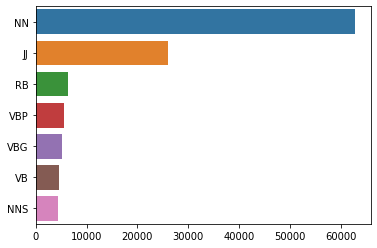

In [109]:
# Code Snippet for Parts of Speach Barchart
# cr = pd.read_csv("gcc_clean.csv", sep = ";")
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
from collections import Counter

def plot_parts_of_speach_barchart(text):
    nltk.download('averaged_perceptron_tagger')

    def _get_pos(text):
        pos=nltk.pos_tag(word_tokenize(text))
        pos=list(map(list,zip(*pos)))[1]
        return pos
    
    tags=text.apply(lambda x : _get_pos(x))
    tags=[x for l in tags for x in l]
    counter=Counter(tags)
    x,y=list(map(list,zip(*counter.most_common(7))))
    
    sns.barplot(x=y,y=x)
cr["cleaned2"] = cr["clean"].apply(str)    
plot_parts_of_speach_barchart(cr['cleaned2'])    

### The most frequent part of speech is noun, and the secod one is the proper noun.
- You can dig deeper into this by investigating which singular noun occur most commonly in reviews

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Micha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


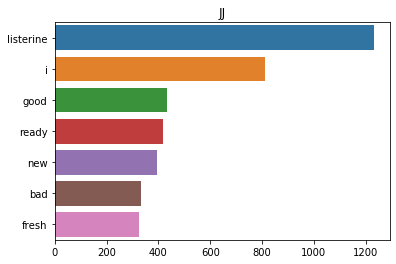

In [120]:
# Code Snippet for Most Common Part of Speach Barchart

import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
from collections import Counter

def plot_most_common_part_of_speach_barchart(text, part_of_speach='JJ'):
    nltk.download('averaged_perceptron_tagger')
    
    def _filter_pos(text):
        pos_type=[]
        pos=nltk.pos_tag(word_tokenize(text))
        for word,tag in pos:
            if tag==part_of_speach:
                pos_type.append(word)
        return pos_type


    words=text.apply(lambda x : _filter_pos(x))
    words=[x for l in words for x in l]
    counter=Counter(words)
    x,y=list(map(list,zip(*counter.most_common(7))))
    sns.barplot(x=y,y=x).set_title(part_of_speach)

   
plot_most_common_part_of_speach_barchart(cr['cleaned1'])    

##### According to the visualization the noun listerin is the most frequent one in the NN catagory and so on.

## Exploring through text complexity

* It can be very informative to know how readable (difficult to read) the text is and what type of reader can fully understand it. Do we need a college degree to understand the message or a first-grader can clearly see what the point is?

* You can actually put a number called readability index on a document or text. Readability index is a numeric value that indicates how difficult (or easy) it is to read and understand a text.

- There are many readability score formulas available for the English language. Some of the most prominent ones are:

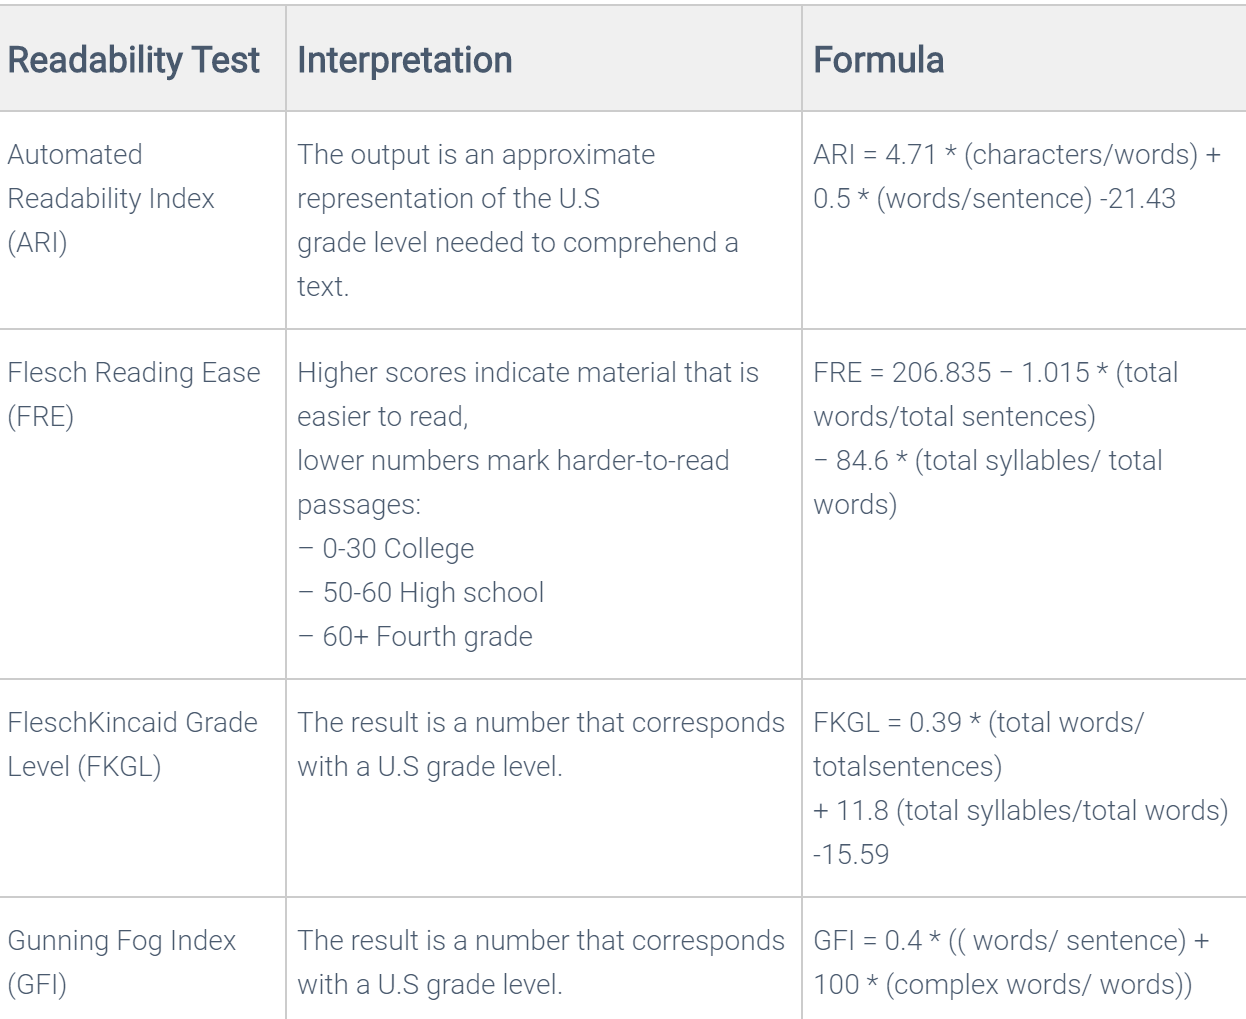

In [ ]:
#!pip install textstat

#### Textstat is a cool Python library that provides an implementation of all these text statistics calculation methods. Let’s use Textstat to implement Flesch Reading Ease index.

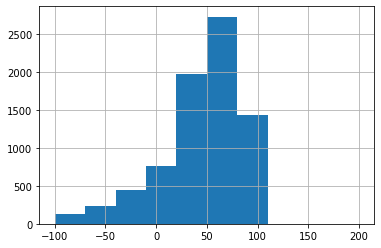

In [112]:
# Code Snippet for Text Complexity Histogram

from textstat import flesch_reading_ease

def plot_text_complexity_histogram(text):
    text.\
        apply(lambda x : flesch_reading_ease(x)).\
        hist(range = (-100, 200))
plot_text_complexity_histogram(cr['cleaned1'])  
ax.tick_params(bottom="off", top="off", left="off", right="off")
ax.grid(False)


#### Almost most of the readability scores fall above 25 to 100, mostly 50 to 100. The average 10 year-old students can read and understand the reviews.

In [123]:
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.utils import plot_model
import keras
from keras import metrics
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils.np_utils import to_categorical
from keras.layers import Conv1D, GlobalMaxPooling1D, Dropout, Dense, GRU, LSTM, Bidirectional
from keras.layers.embeddings import Embedding
from keras.models import Sequential, load_model
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist

In [124]:
cr['subject_level_1_desc'].fillna(" ", inplace=True)
cr['subject_level_2_desc'].fillna("others", inplace=True)
cr['subject_level_3_desc'].fillna("others", inplace=True)


In [168]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform().toarray()

TypeError: __init__() got an unexpected keyword argument 'categorical_features'